# Wavelets!

The Fourier transform, which is an inner product of a signal with the sine/cosine basis functions, can be generalized to other types of basis functions. A basis function is a generalized notion of a coordinate system. 

Wavelets allow for both multi-resolution analysis, like the STFT, as well as analysis in a different basis. The main advantage of using other basis functions is that some signals can be more sparsely represented in a particular basis. A square wave requires many coefficients (odd harmonics above the fundamental) in the Fourier basis, but only one coefficient in the Haar basis - adjustments can be made for non-power of two scaling factors. 

The purpose of this notebook is to demonstrate how to use the PyWavelets module and help others learn about wavelets. 

In [110]:
import pywt
from pylab import log2,zeros,linspace,sin,pi,imshow,show,plt

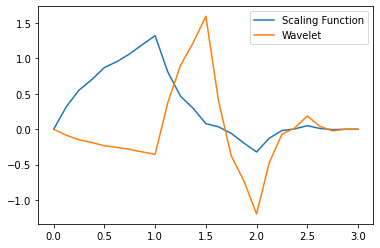

In [111]:
# First, use pywt.Wavelet(w) - this gets an object assosicated with the wavelet 'w'
# This object contains the coefficients for low and highpass filter bank analysis and synthesis
# It can also generate wavelets with the cascade algorithm, which is an iterated filter and resampling algorithm
db2 = pywt.Wavelet("db2")
phi,psi,tx=db2.wavefun(3) # Cascade algorithm
plt.plot(tx,phi)
plt.plot(tx,psi)
plt.legend(['Scaling Function', 'Wavelet'])
plt.show()

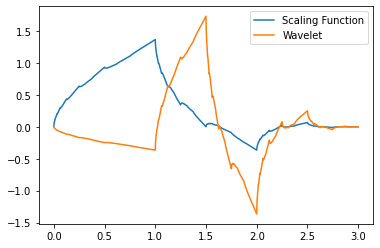

In [112]:
# Using more iterations in the cascade algorithm gives finer detail
# More detail is different than db3, db4...as these come from iterating longer initial polynomials
db2 = pywt.Wavelet("db2")
phi,psi,tx=db2.wavefun(10)
plt.plot(tx,phi)
plt.plot(tx,psi)
plt.legend(['Scaling Function', 'Wavelet'])
plt.show()

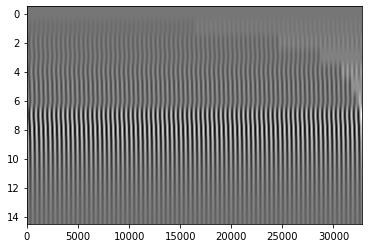

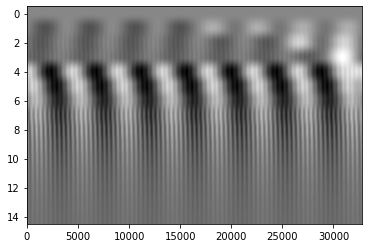

In [113]:
# Create an image to view the stationary wavelet transform (SWT) 
# Note that the 'scale' variable in wavelet transforms is inverse to frequency
def viewSWT(x,l=16,wavelet='db1'):
    lp2 = 2**int(log2(len(x)))
    sig = x[0:lp2]
    W = pywt.swt(sig,wavelet)
    L = min(l,len(W))
    img = zeros((L,len(W[0][0])))

    for k in range(len(W)):
        img[k:(k+1),:] = W[k][0]

    imshow(img,cmap='gray',aspect='auto')
    show()

# Setup time variables
fs = 44100
ts = 1.0/fs
L = 1
t = linspace(0,1-ts,int(fs*L))
    
# Single sine wave
x = sin(2*pi*t*100)
viewSWT(x)
# Two sine waves
x = (sin(2*pi*t*100) + sin(2*pi*t*10))/2
viewSWT(x)

In [114]:
# Make a function to concatenate one period into a longer signal
def repeater(x,L):
    N = int(L/len(x))
    y = []
    for i in range(N):
        y = concatenate((y,x))
    return y            

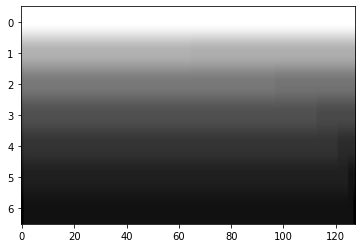

In [115]:
# Look at the SWT of the db2
db1 = pywt.Wavelet("db1")
phi,psi,tx=db1.wavefun(7)
x = phi
viewSWT(x,7)

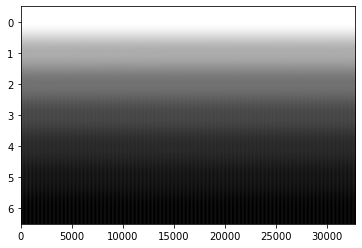

In [116]:
# Use the repeater function to capture more periods, resulting in less spectral leakage
db2 = pywt.Wavelet("db2")
phi,psi,tx = db2.wavefun(7)
x = repeater(phi,fs)
viewSWT(x,7,'db2')

In [117]:
# Listen to the wavelet!
import IPython.display as ipd
ipd.Audio(x, rate=fs) # Play a sine wave

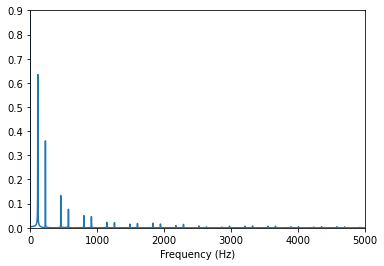

In [118]:
# Alternative basis functions can be used in many instances
# It is still useful to look at their spectrum in the Fourier basis
from pylab import fft
X = fft(x,fs)
plt.plot(abs(X/max(abs(X))))
plt.axis([0,5000,0,0.9])
plt.xlabel("Frequency (Hz)")
show()